Giovanna Nascimento Antonieti    CP3013383

Daniel Brai Gonzales Marcos      CP3013375

# Base de dados

O banco de dados Northwind é uma base de exemplo desenvolvida pela Microsoft. Esse banco contém os dados de vendas realizadas pela Northwind Traders, uma empresa fictícia de exportação e importação de produtos alimentícios. Esta base é amplamente utilizada para praticar consultas SQL de agregação. Nessa base temos 830 pedidos, 77 produtos, 8 categorias, 4 regiões, 3 transportadoras, 29 fornecedores, 9 empregados e 93 clientes. Abaixo podemos observar como essa base está organizada:

<img src="./edr.png" />

In [1]:
!pip3 install  mysql-connector-python pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import mysql.connector as sql
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
db_connection = sql.connect(host='northwind.cpmh8v6wxjb0.us-east-1.rds.amazonaws.com', database='northwind', user='admin', password='batatinha1234')

# Consultas

## 1. Região das vendas

In [4]:
sales_per_region =  pd.read_sql('Select r.RegionDescription as `Região`, t.TerritoryDescription as `Territorio`,  \
                                CONCAT(e.FirstName," ", e.LastName) as `Vendedor`, o.ShipCountry as `Pais de destino`, \
                                o.Freight as `Frete`, o.OrderDate as `Data do pedido`, o.ShippedDate as `Data de entrega` \
                                from Orders o inner join Employees e on o.EmployeeID=e.EmployeeID \
                                inner join EmployeeTerritories et on e.EmployeeID=et.EmployeeID \
                                inner join Territories t on et.TerritoryID=t.TerritoryID \
                                inner join Region r on r.RegionID=t.RegionID  ', con=db_connection)

In [5]:
sales_per_region

,Região,Territorio,Vendedor,Pais de destino,Frete,Data do pedido,Data de entrega
0,Eastern ...,Wilton ...,Nancy Davolio,Austria,140.51,1996-07-17,1996-07-23
1,Eastern ...,Wilton ...,Nancy Davolio,Finland,136.54,1996-08-01,1996-08-02
2,Eastern ...,Wilton ...,Nancy Davolio,Italy,26.93,1996-08-07,1996-08-09
3,Eastern ...,Wilton ...,Nancy Davolio,Germany,76.83,1996-08-20,1996-08-26
4,Eastern ...,Wilton ...,Nancy Davolio,Brazil,1.35,1996-08-28,1996-09-02
...,...,...,...,...,...,...,...
3955,Northern ...,Minneapolis ...,Anne Dodsworth,Belgium,32.82,1998-03-26,1998-04-23
3956,Northern ...,Minneapolis ...,Anne Dodsworth,UK,33.80,1998-04-10,1998-04-13
3957,Northern ...,Minneapolis ...,Anne Dodsworth,Austria,754.26,1998-04-13,1998-04-20
3958,Northern ...,Minneapolis ...,Anne Dodsworth,Brazil,6.27,1998-04-14,1998-05-04


## 2. Número de pedidos de cada consumidor

In [6]:
number_sales_per_customer =  pd.read_sql('select  x.`Quantidade de compras`, c.CompanyName as `Empresa` from \
                                        (select count(*) as `Quantidade de compras`, c.CustomerID from Orders o \
                                        inner join Customers c on o.CustomerID=c.CustomerID group by c.CustomerID ) x \
                                        inner join Customers c on c.CustomerID=x.CustomerId \
                                        order by `Quantidade de compras` desc ', con=db_connection)

In [7]:
number_sales_per_customer

,Quantidade de compras,Empresa
0,31,Save-a-lot Markets
1,30,Ernst Handel
2,28,QUICK-Stop
3,19,Hungry Owl All-Night Grocers
4,19,Folk och f HB
...,...,...
84,3,Laughing Bacchus Wine Cellars
85,3,France restauration
86,2,Lazy K Kountry Store
87,2,GROSELLA-Restaurante


## 3. Valor médio das vendas por vendedor

In [8]:
avg_sales_employee = pd.read_sql('SELECT Format(x.`Valor vendas médias`,2) as `Valor vendas médias`, \
                                  CONCAT(e.FirstName," ", e.LastName) as `Vendedor` from \
                                  (SELECT  e.EmployeeID, AVG(od.UnitPrice) as  `Valor vendas médias` \
                                  FROM Orders o inner join Employees e on o.EmployeeID=e.EmployeeID \
                                  inner join northwind.`Order Details` od on od.OrderID=o.OrderID group by e.EmployeeID) x \
                                  inner join Employees e on e.EmployeeID=x.EmployeeID ', con=db_connection)

In [9]:
avg_sales_employee

,Valor vendas médias,Vendedor
0,25.31,Nancy Davolio
1,28.69,Andrew Fuller
2,27.25,Janet Leverling
3,26.64,Margaret Peacock
4,23.48,Steven Buchanan
5,22.83,Michael Suyama
6,26.80,Robert King
7,24.00,Laura Callahan
8,31.59,Anne Dodsworth


## 4. 10 produtos com maior arrecadação

In [10]:
reveneu_per_product = pd.read_sql('Select p.ProductName as `Produto`, x.`Valor total das vendas por produto`, \
                                    s.CompanyName as `Fornecedor` from (select od.ProductID, \
                                     Format(sum((od.UnitPrice*od.Quantity)-od.Discount),2) \
                                     as `Valor total das vendas por produto` from Orders o inner join \
                                     northwind.`Order Details` od on o.OrderID = od.OrderID inner join Products p \
                                     on p.ProductID=od.ProductID group by od.ProductID) x  \
                                     inner join Products p on p.ProductID=x.ProductId \
                                     inner join Suppliers s on s.SupplierID=p.SupplierID \
                                     order by x.`Valor total das vendas por produto` desc limit 10', con=db_connection)

In [11]:
reveneu_per_product

,Produto,Valor total das vendas por produto,Fornecedor
0,Original Frankfurter grne Soe,"9,685.00",Plutzer Lebensmittelgromrkte AG
1,Sir Rodney's Scones,"9,636.00","Specialty Biscuits, Ltd."
2,Maxilaku,"9,500.00",Karkki Oy
3,Chef Anton's Cajun Seasoning,"9,424.80",New Orleans Cajun Delights
4,Scottish Longbreads,"9,362.50","Specialty Biscuits, Ltd."
5,Singaporean Hokkien Fried Mee,"9,332.40",Leka Trading
6,Mascarpone Fabioli,"9,171.20",Formaggi Fortini s.r.l.
7,Jack's New England Clam Chowder,"9,098.10",New England Seafood Cannery
8,Thringer Rostbratwurst,"87,736.40",Plutzer Lebensmittelgromrkte AG
9,Mishi Kobe Niku,"8,827.00",Tokyo Traders


## 5. Quantidade vendida vs preço unitário médio

In [12]:
mean_price_quantity = pd.read_sql('select p.ProductName as `Produto`, x.`Preço médio`, x.`Quantidade total vendida`  \
                                  from (select p.ProductID, format(avg(p.UnitPrice),2) as `Preço médio`,   \
                                        sum(od.Quantity) as `Quantidade total vendida` FROM Products p  \
                                        inner join northwind.`Order Details` od on p.ProductID = od.ProductID \
                                        group by p.ProductID) x inner join Products p on x.ProductID=p.ProductID \
                                  order by x.`Preço médio` desc', con=db_connection)

In [13]:
mean_price_quantity

,Produto,Preço médio,Quantidade total vendida
0,Mishi Kobe Niku,97.00,95.0
1,Jack's New England Clam Chowder,9.65,981.0
2,Zaanse koeken,9.50,485.0
3,Rogede sild,9.50,508.0
4,Teatime Chocolate Biscuits,9.20,723.0
...,...,...,...
72,Scottish Longbreads,12.50,799.0
73,Spegesild,12.00,548.0
74,Aniseed Syrup,10.00,328.0
75,Sir Rodney's Scones,10.00,1016.0


## 6. Produto mais vendido em cada categoria

In [14]:
product_per_category = pd.read_sql('SELECT cat_ext.CategoryName AS Categoria, \
                                    (SELECT p.ProductName FROM northwind.Categories cat_int \
                                    INNER JOIN northwind.Products p ON p.CategoryID = cat_int.CategoryID \
                                    INNER JOIN northwind.`Order Details` od on od.ProductID = p.ProductID \
                                    INNER JOIN northwind.Orders o ON od.OrderID = o.OrderID \
                                    WHERE cat_int.CategoryID = cat_ext.CategoryID \
                                    ORDER BY od.Quantity DESC LIMIT 1) AS  Produto \
                                    FROM northwind.Categories cat_ext', con=db_connection)

In [15]:
product_per_category

,Categoria,Produto
0,Beverages,Chartreuse verte
1,Condiments,Sirop d'rable
2,Confections,Schoggi Schokolade
3,Dairy Products,Raclette Courdavault
4,Grains/Cereals,Wimmers gute Semmelkndel
5,Meat/Poultry,Perth Pasties
6,Produce,Manjimup Dried Apples
7,Seafood,Jack's New England Clam Chowder


## 7. Os principais produtos mais vendidos em cada categoria em cada ano


In [16]:
product_per_category_per_year = pd.read_sql("WITH order_values AS( \
                                            SELECT c.CategoryName AS Categoria, p.ProductName AS Produto, \
                                            YEAR(o.OrderDate) as Ano, FORMAT(SUM(od.Quantity*od.UnitPrice),2) AS 'Valor Total Vendido (Ano)', \
                                            RANK() OVER( \
                                            PARTITION BY YEAR(o.OrderDate) ORDER BY SUM(od.Quantity*od.UnitPrice ) DESC\
                                            ) 'Posição' FROM northwind.Categories c \
                                            INNER JOIN northwind.Products p ON p.CategoryID = c.CategoryID \
                                            INNER JOIN northwind.`Order Details` od on od.ProductID = p.ProductID \
                                            INNER JOIN northwind.Orders o ON od.OrderID = o.OrderID \
                                            GROUP BY Categoria, Produto, Ano) \
                                            SELECT * FROM order_values WHERE 'Posição' <=3" , con=db_connection)

In [17]:
product_per_category_per_year

,Categoria,Produto,Ano,Valor Total Vendido (Ano),Posição
0,Beverages,Cte de Blaye,1996,"29,512.00",1
1,Meat/Poultry,Thringer Rostbratwurst,1996,"12,177.00",2
2,Dairy Products,Raclette Courdavault,1996,"10,164.00",3
3,Dairy Products,Camembert Pierrot,1996,"10,064.00",4
4,Confections,Tarte au sucre,1996,"9,850.00",5
...,...,...,...,...,...
222,Produce,Longlife Tofu,1998,400.00,72
223,Meat/Poultry,Mishi Kobe Niku,1998,291.00,73
224,Seafood,Rd Kaviar,1998,180.00,74
225,Confections,Chocolade,1998,102.00,75


## 8. Vendas por estação

In [18]:
sales_per_season= pd.read_sql(
    """
    SELECT Season AS 'Estação', COUNT(1) Vendas FROM (
        SELECT CASE
            WHEN MONTH(OrderDate) BETWEEN 1 and 3 THEN 'Primavera'
            WHEN MONTH(OrderDate) BETWEEN 4 and 6 THEN 'Verão' 
            WHEN MONTH(OrderDate) BETWEEN 7 and 9 THEN 'Outono'
            WHEN MONTH(OrderDate) BETWEEN 10 and 12 THEN 'Inverno'
        END AS Season 
    FROM Orders 
    ORDER BY Season DESC) AS OrdersBySeasons 
    group by Season
    ORDER BY Vendas DESC 
    """, con=db_connection)

In [19]:
sales_per_season

,Estação,Vendas
0,Primavera,274
1,Inverno,202
2,Verão,181
3,Outono,173


## 9. Fornecedor com maior valor de produtos vendidos

In [20]:
sales_per_supplier = pd.read_sql("SELECT s.CompanyName AS 'Empresa', FORMAT(SUM(od.UnitPrice*od.Quantity), 2) AS 'Total de Vendas' \
                        FROM northwind.`Order Details` od INNER JOIN northwind.Products p ON od.ProductID = p.ProductID \
                        INNER JOIN northwind.Suppliers s ON p.SupplierID = s.SupplierID \
                        GROUP BY s.CompanyName ORDER BY SUM(od.UnitPrice*od.Quantity) DESC", con=db_connection)

In [21]:
sales_per_supplier

,Empresa,Total de Vendas
0,Aux joyeux ecclsiastiques,"163,135.00"
1,Plutzer Lebensmittelgromrkte AG,"155,946.55"
2,Gai pturage,"126,582.00"
3,"Pavlova, Ltd.","115,386.05"
4,"G'day, Mate","69,636.60"
5,Forts d'rables,"66,266.70"
6,Pasta Buttini s.r.l.,"52,929.00"
7,Formaggi Fortini s.r.l.,"51,082.50"
8,"Specialty Biscuits, Ltd.","48,793.80"
9,Norske Meierier,"46,897.20"


# 10. Preço unitário médio do frete por transportadora

In [22]:
average_unit_freight_cost_by_supplier = pd.read_sql(
    """
    SELECT 
        s.CompanyName AS Transportadora, 
        FORMAT(AVG(o.Freight/od.Quantity), 2) AS 'Custo de Frete por Unidade Médio'
    FROM 
    northwind.`Order Details` od, 
    northwind.Orders o,
    northwind.Shippers s
    WHERE od.OrderId = o.OrderId
    AND s.ShipperID = o.ShipVia
    GROUP BY s.CompanyName;
    """, con=db_connection)

In [23]:
average_unit_freight_cost_by_supplier

,Transportadora,Custo de Frete por Unidade Médio
0,Speedy Express,4.89
1,United Package,5.84
2,Federal Shipping,5.19


# Visualizações

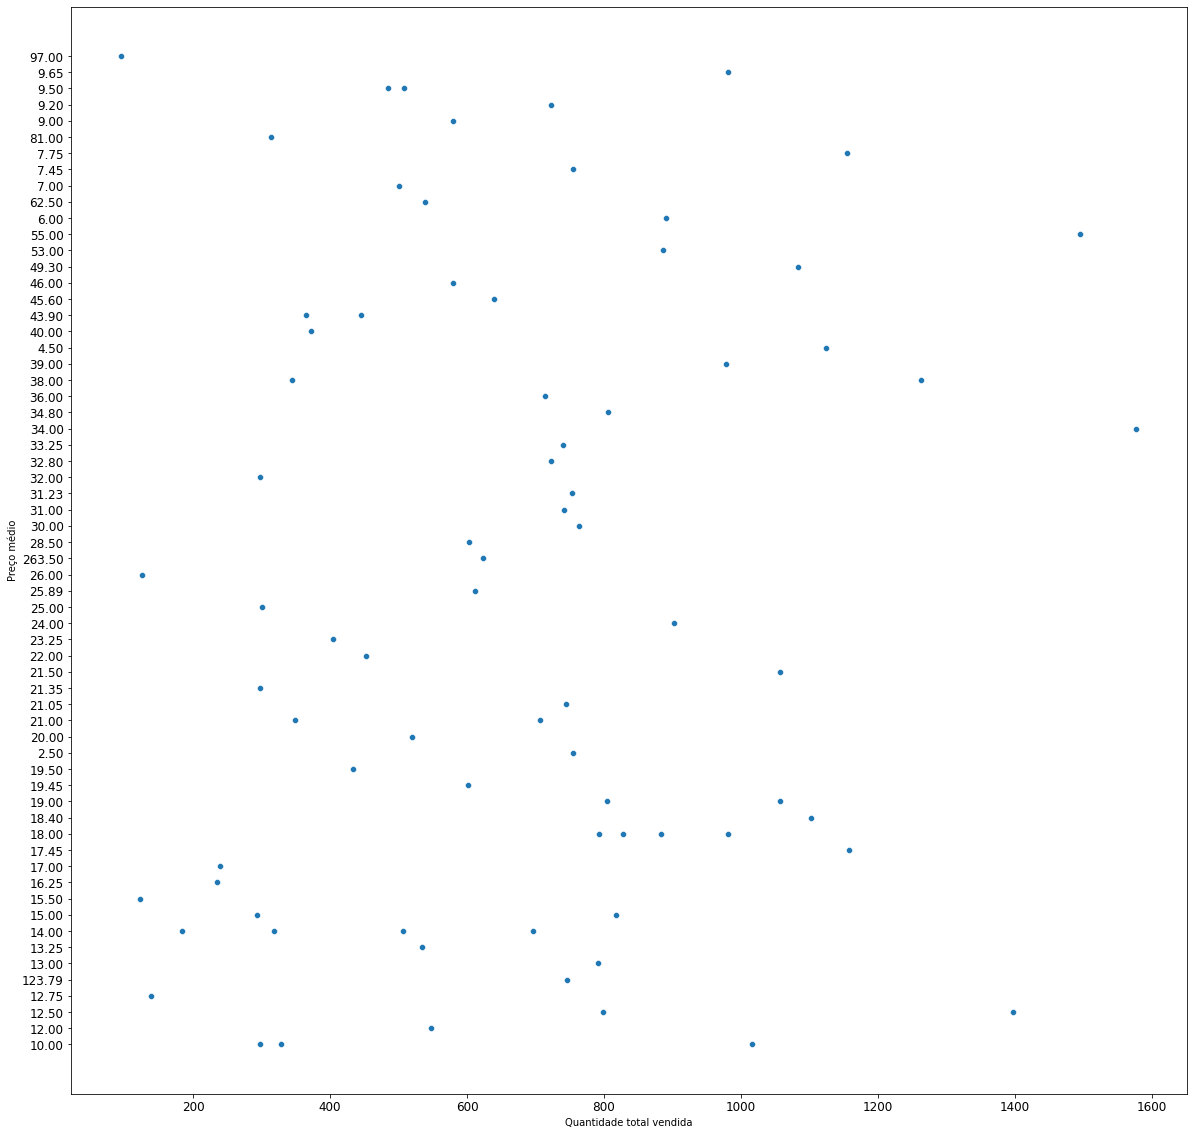

In [24]:
plt.figure(figsize=(20, 20))
g = sns.scatterplot(x=mean_price_quantity['Quantidade total vendida'], y=mean_price_quantity['Preço médio'])

## Número de pedidos dos dez consumidores mais assíduos

Text(0.5, 1.0, 'Top 10 empresas com mais pedidos')

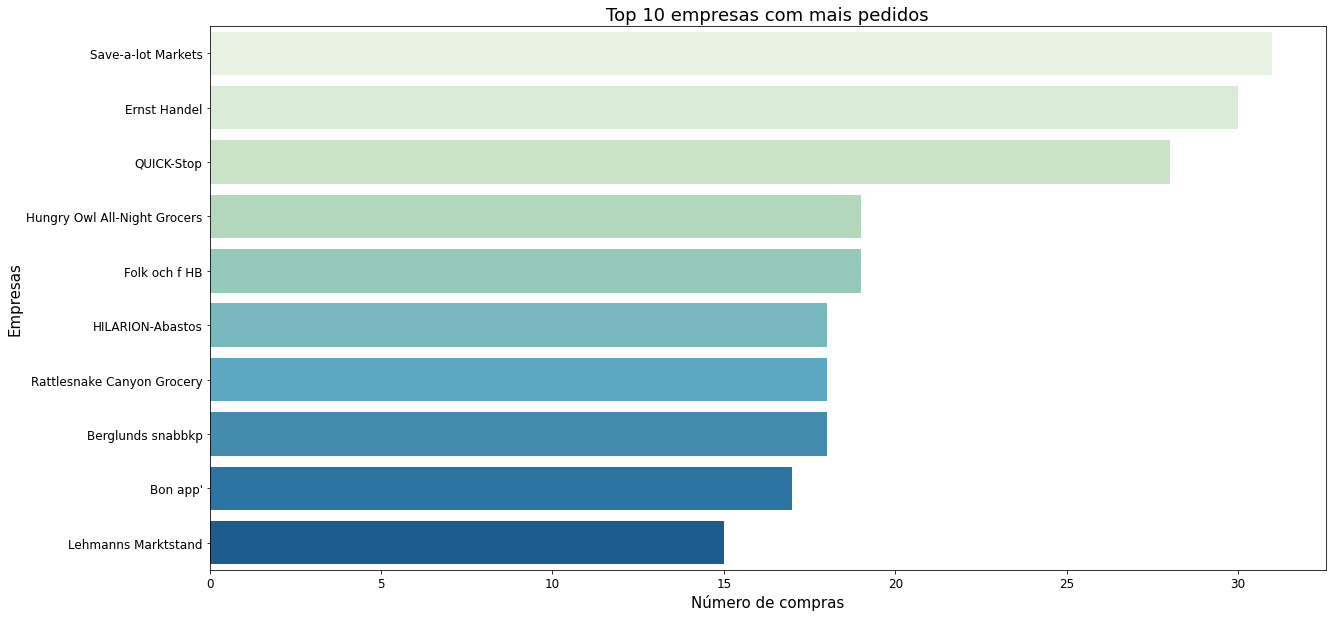

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(y = number_sales_per_customer.iloc[:10,:]['Empresa'], x=number_sales_per_customer.iloc[:10,:]['Quantidade de compras'], palette='GnBu')

plt.xlabel("Número de compras", fontsize=15)
plt.ylabel("Empresas", fontsize= 15)
plt.title('Top 10 empresas com mais pedidos', fontsize=18)

# Evidências instância AWS

<img src="./northwind_info.png" />

<img src="./northwind_monitoramento.png" /> 